In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import glob
from scipy.stats import ttest_ind

In [3]:
resultDir = 'results'
problem = 'setcover' # choices=['setcover', 'cauctions', 'facilities', 'indset']
sampling_Strategies = ['uniform5','depthK','depthK2', 'depthK_adaptive'] # choices: uniform5, depthK, depthK2, depthK3
sampling_seed = 0

In [40]:
sampleTimes_allStrategies = pd.DataFrame()
for sampling_Strategy in sampling_Strategies:
    problem_folders = {
        'setcover': f'setcover/500r_1000c_0.05d({sampling_Strategy})/{sampling_seed}',
        'cauctions': f'cauctions/100_500({sampling_Strategy})/{sampling_seed}',
        'facilities': f'facilities/100_100_5({sampling_Strategy})/{sampling_seed}',
        'indset': f'indset/500_4({sampling_Strategy})/{sampling_seed}',
    }
    problem_folder = problem_folders[problem]
    depthTablePath = f'data/samples/{problem_folder}/depthTable(trainSol).csv'
    depthTable = pd.read_csv(depthTablePath, index_col=0)
    sampleTimes_allStrategies[f'{sampling_Strategy}'] = depthTable['sampleTimes']

In [41]:
bin_size = 5
binned = sampleTimes_allStrategies.groupby(sampleTimes_allStrategies.index // bin_size).sum()
binned = binned / binned.sum()
binned['GroupName'] = [f"[{i*bin_size},{(i+1)*bin_size-1}]" for i in binned.index]
binned

,uniform5,depthK,depthK2,GroupName
0,0.072446,0.575784,0.122598,"[0,4]"
1,0.438390,0.325784,0.316560,"[5,9]"
2,0.363467,0.087979,0.313815,"[10,14]"
3,0.114551,0.010453,0.192132,"[15,19]"
4,0.011146,0.000000,0.053065,"[20,24]"
5,0.000000,0.000000,0.001830,"[25,29]"


[Text(0, 0, '[25,29]'),
 Text(0, 1, '[20,24]'),
 Text(0, 2, '[15,19]'),
 Text(0, 3, '[10,14]'),
 Text(0, 4, '[5,9]'),
 Text(0, 5, '[0,4]')]

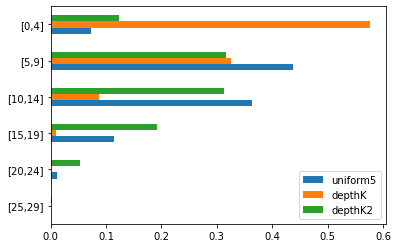

In [42]:
inv_bins = binned.sort_index(ascending=False)
axe = inv_bins.plot.barh()
axe.set_yticklabels(inv_bins['GroupName'])
# axe.savefig(f'depthDist{problem}.pdf')

# 保存单个 depthTable 的 accessTimes

先读取`depthTable(trainSol).csv`, 这个是保存每种sampling strategy采样过程中的访问深度情况和采样情况，我们只需要读取uniform5 的 depthTable 的 accessTime 列就行了


In [10]:
sampleDir = 'data/samples'
problem = 'setcover' # choices=['setcover', 'cauctions', 'facilities', 'indset']
# sampling_Strategy = 'uniform5' # choices: uniform5, depthK, depthK2, depth_adaptive
sampling_seed = 0

depthTablePaths = {
    'setcover': f'setcover/500r_1000c_0.05d(uniform5)/{sampling_seed}',
    'cauctions': f'cauctions/100_500(uniform5)/{sampling_seed}',
    'facilities': f'facilities/100_100_5(uniform5)/{sampling_seed}',
    'indset': f'indset/500_4(uniform5)/{sampling_seed}',
}
depthTablePath = f'{sampleDir}/{depthTablePaths[problem]}/depthTable(trainSol).csv'
depthTable = pd.read_csv(depthTablePath, index_col=0)

In [11]:
bin_size = 5
binned = depthTable['accessTimes'].groupby(depthTable.index // bin_size).sum()
binned /= binned.sum()
binned.index.name = 'depth//5'
binned

depth//5
0    0.086655
1    0.438031
2    0.355058
3    0.110559
4    0.009635
5    0.000061
Name: accessTimes, dtype: float64

In [12]:
binned.to_csv('depthTable_SolSB_binned5.csv')

In [37]:
dff = pd.read_csv('depthTable_SolSB_binned5.csv', index_col='depth//5')
dff

,accessTimes
depth//5,
0,0.126149
1,0.412810
2,0.300835
3,0.105769
4,0.036508
5,0.012833
6,0.004405
7,0.000690
